In [1]:
%run my_split_func2.ipynb
# Function = my_train_test_split(X, y)
%run plot_features_importance.ipynb
#Function = plot_features_importance(model)

In [2]:
# df will return grouped dataframe to act on

### Establish each body part dataframe for modeling

In [3]:
# This will drop Arms & Torso columns
legs = df.drop(['LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro',
                'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 'RA_xacc', 
                'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 'RA_xmag', 
                'RA_ymag', 'RA_zmag', 'T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro',
                'T_zgyro', 'T_xmag', 'T_ymag', 'T_zmag'], axis=1)

In [4]:
# This will drop Legs & Torso
arms = df.drop(['T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro', 
                'T_xmag', 'T_ymag', 'T_zmag', 'RL_xacc', 'RL_yacc', 'RL_zacc', 
                'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 'RL_xmag', 'RL_ymag', 'RL_zmag', 
                'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 
                'LL_xmag', 'LL_ymag', 'LL_zmag'], axis=1)

In [5]:
# This will drop arms & Legs
torso = df.drop(['RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro', 
                 'RA_xmag', 'RA_ymag', 'RA_zmag', 'LA_xacc', 'LA_yacc', 'LA_zacc', 
                 'LA_xgyro', 'LA_ygyro', 'LA_zgyro', 'LA_xmag', 'LA_ymag', 'LA_zmag', 
                 'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xgyro', 'RL_ygyro', 'RL_zgyro', 
                 'RL_xmag', 'RL_ymag', 'RL_zmag', 'LL_xacc', 'LL_yacc', 'LL_zacc', 
                 'LL_xgyro', 'LL_ygyro', 'LL_zgyro', 'LL_xmag', 'LL_ymag', 'LL_zmag'], axis=1)

# Train Model on Torso

In [6]:
rf_torso = RandomForestClassifier()

In [7]:
y = torso['activity_number']
X = torso.drop('activity_number', axis=1)

In [8]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [9]:
rf_torso.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [10]:
rf_torso.score(X_test, y_test)

0.4789473684210526

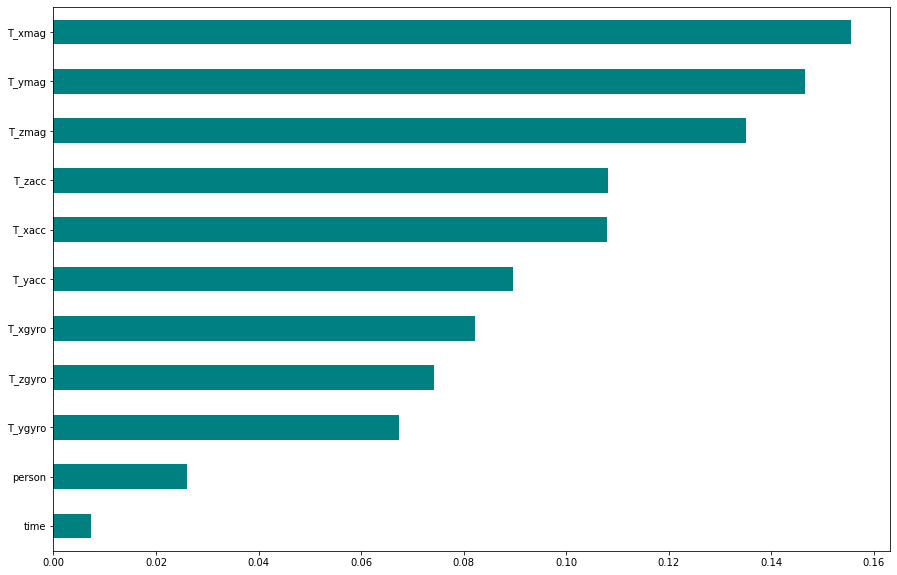

In [11]:
plot_features_importance(rf_torso, 'teal')

# Train model on Arms

In [12]:
rf_arms = RandomForestClassifier()

In [13]:
y = arms['activity_number']
X = arms.drop('activity_number', axis=1)

In [14]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [15]:
rf_arms.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
rf_arms.score(X_test, y_test)

0.7157894736842105

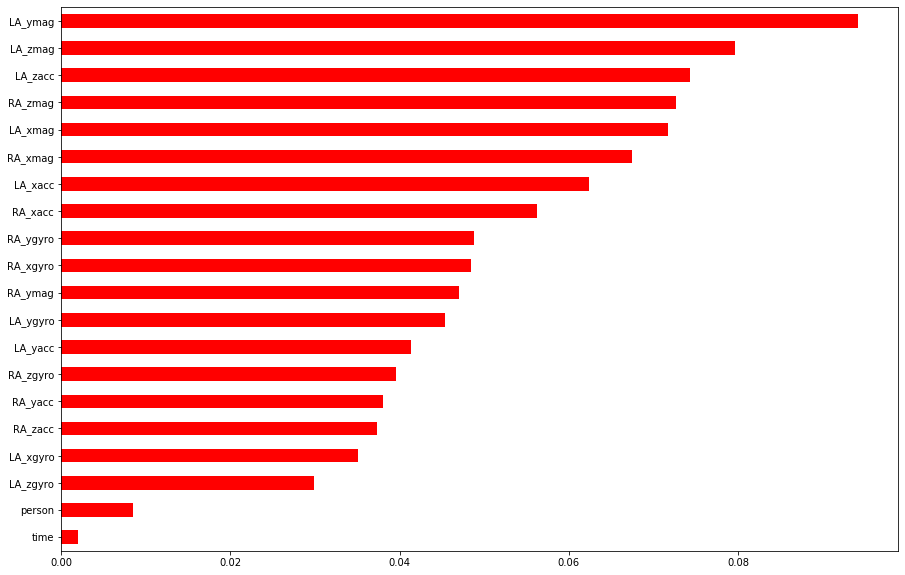

In [17]:
plot_features_importance(rf_arms, 'red')

# Train model on Legs

In [18]:
rf_legs = RandomForestClassifier()

In [19]:
y = legs['activity_number']
X = legs.drop('activity_number', axis=1)

In [20]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [21]:
rf_legs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
rf_legs.score(X_test, y_test)

0.7684210526315789

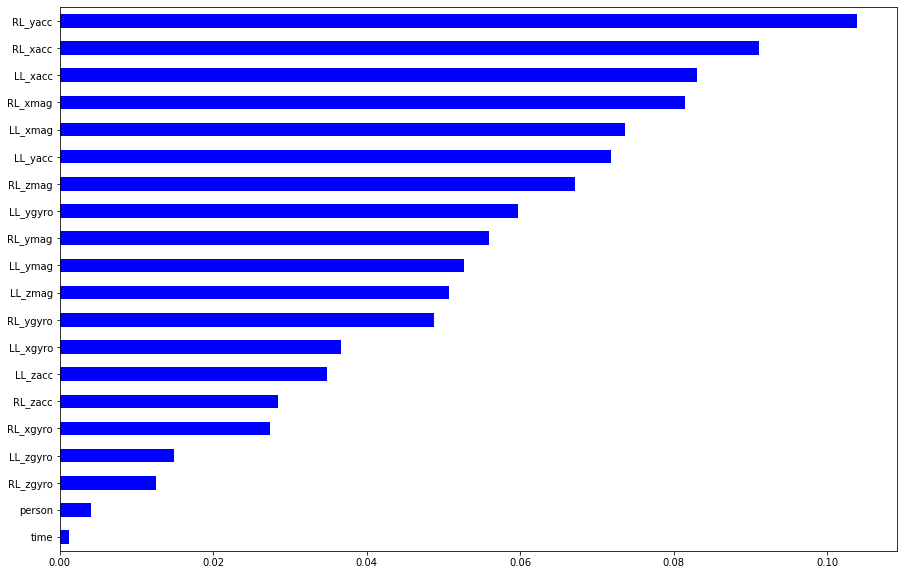

In [23]:
plot_features_importance(rf_legs, 'blue')

## Torso conclusion:
- Ranking of sensor importance for Torso:
    - 1st mag(netometers)
    - 2nd acc(elerometers)
    - 3rd gyro(scopes)
    
### Leverage the Torso's x,y,z mag(netometers)

## Arms conclusion:
- Ranking of sensor importance for Arms:
    - 1st mag(netometers)
    - 2nd acc(elerometers)
    - 3rd gyro(scopes)
    
### Leverage the Arms's x,y,z mag(netometers), mabe acc(elerometers) as a close 2nd...

## Legs conclusion:
- Ranking of sensor importance for Legs:
    - 1st - TIE - mag(netometers) & acc(elerometers)
    - 2nd - gyro(scopes)

## Train model on limited combination
Going to pull the following features from the dataframe:
- Torso mag features (x,y,z)
- Arms mag features (x,y,z)
- Legs mag & acc (x,y,z)

In [24]:
rf_combo = RandomForestClassifier()

In [25]:
drop_these = [
    # Torso features to drop
    'T_xacc', 'T_yacc', 'T_zacc', 'T_xgyro', 'T_ygyro', 'T_zgyro',
    # Arm features to drop
    'RA_xacc', 'RA_yacc', 'RA_zacc', 'RA_xgyro', 'RA_ygyro', 'RA_zgyro',
    'LA_xacc', 'LA_yacc', 'LA_zacc', 'LA_xgyro', 'LA_ygyro', 'LA_zgyro',
    #Leg features to drop
    'RL_xacc', 'RL_yacc', 'RL_zacc', 'RL_xmag', 'RL_ymag', 'RL_zmag',
    'LL_xacc', 'LL_yacc', 'LL_zacc', 'LL_xmag', 'LL_ymag', 'LL_zmag',
    # Dropping person & time since it almost has 0 feature importance
    'time', 'person'
]

In [26]:
combo_df = df.drop(drop_these, axis=1)

In [27]:
y = combo_df['activity_number']
X = combo_df.drop('activity_number', axis=1)

In [28]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [29]:
rf_combo.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [30]:
rf_combo.score(X_test, y_test)

0.7526315789473684

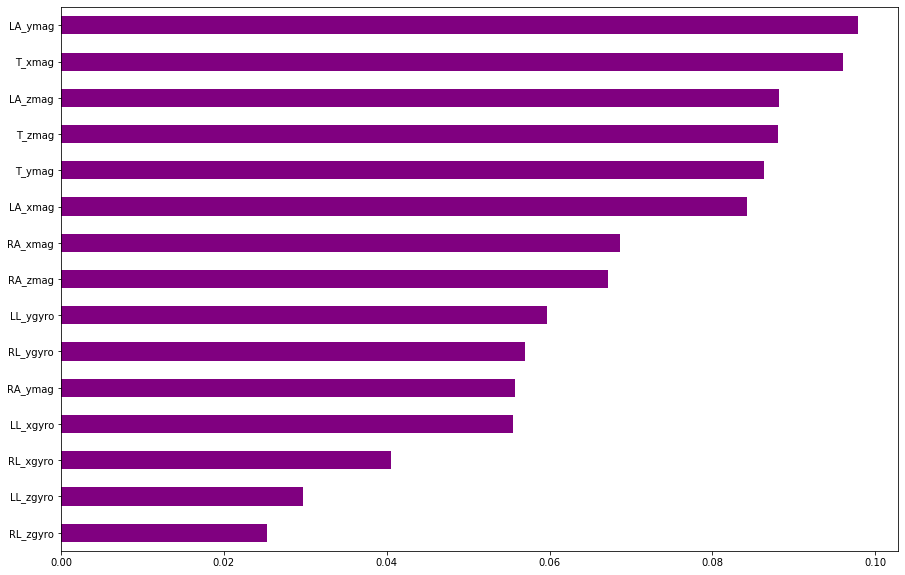

In [31]:
plot_features_importance(rf_combo, 'purple')

# Seems like the Torso sensors may have brought down the score... <br/> Will try combo with Arms & Legs

In [32]:
rf_combo2 = RandomForestClassifier()

In [33]:
y = df['activity_number']
X = df.drop(['T_xacc', 'T_yacc', 'T_zacc', 
     'T_xgyro', 'T_ygyro', 'T_zgyro', 
     'T_xmag', 'T_ymag', 'T_zmag', 'activity_number'], axis=1)

In [34]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [35]:
rf_combo2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
rf_combo2.score(X_test, y_test)

0.8052631578947368

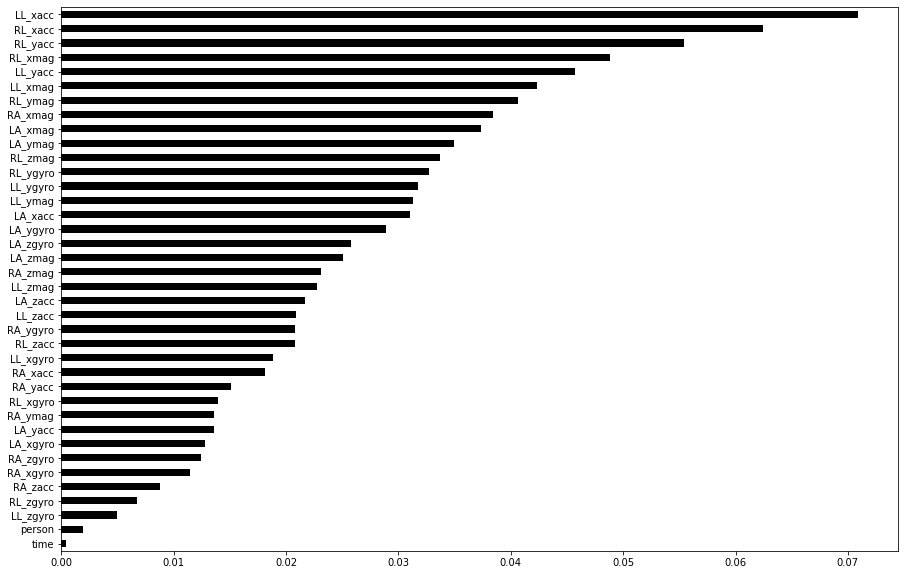

In [37]:
plot_features_importance(rf_combo2, 'black')

### Train models on standard deviation & variance of the data

In [38]:
std = '/Users/Lisa/_Sports_Activity_Capstone/grouped_data/grouped_std_data.csv'
var = '/Users/Lisa/_Sports_Activity_Capstone/grouped_data/grouped_variance_data.csv'

In [39]:
df_std = pd.read_csv(std)
df_var = pd.read_csv(var)

## Check feature importance for each dataframe

### Checking feature importance for standard deviation data

In [40]:
rf_std = RandomForestClassifier()

In [41]:
y = df_std['activity_number']
X = df_std.drop('activity_number', axis=1)

In [42]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [43]:
rf_std.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
rf_std.score(X_test, y_test)

0.8947368421052632

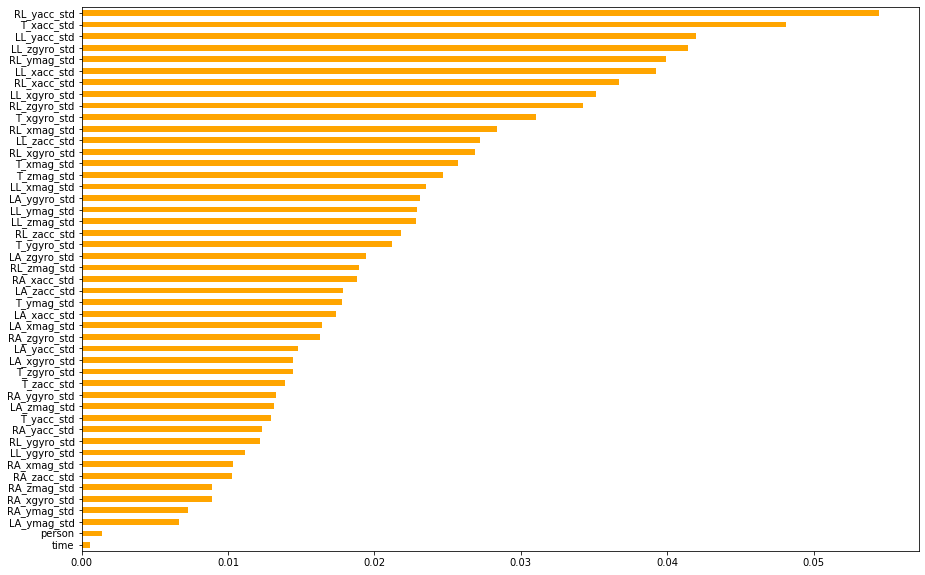

In [45]:
plot_features_importance(rf_std, 'orange')

### Checking feature importance for variance data

In [46]:
rf_var = RandomForestClassifier()

In [47]:
y = df_var['activity_number']
X = df_var.drop('activity_number', axis=1)

In [48]:
X_train, X_test, y_train, y_test, random_values = my_train_test_split(X, y)

In [49]:
rf_var.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
rf_var.score(X_test, y_test)

0.9052631578947369

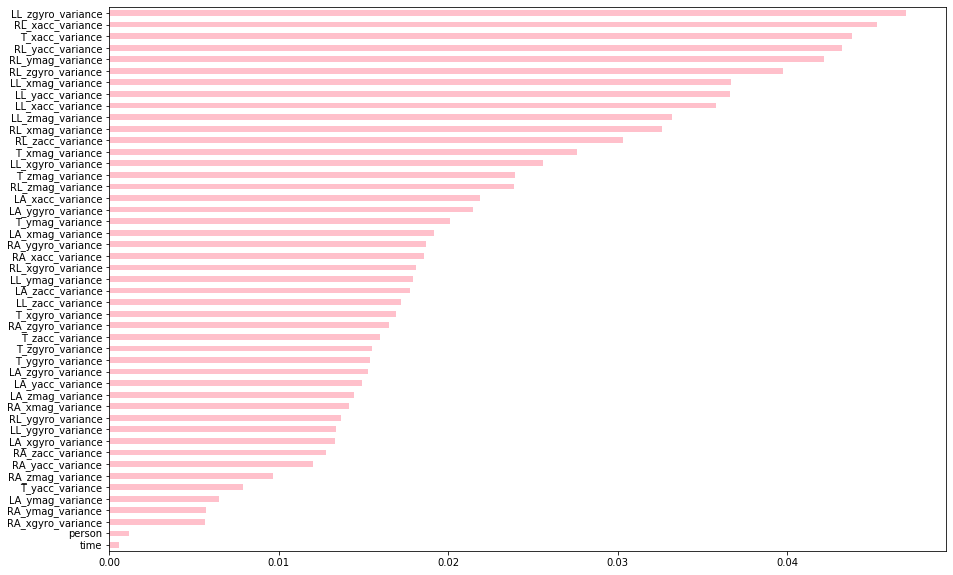

In [51]:
plot_features_importance(rf_var, 'pink')

## Interesting performance on Legs & Variance - will combine the two dataframes

In [52]:
# Combine the df_var & legs dataframe for modeling

In [53]:
legs_and_var = pd.merge(df_var, legs, how='inner', on=['person', 'activity_number', 'time'])

In [54]:
legs_and_var

,person,activity_number,time,T_xacc_variance,T_yacc_variance,T_zacc_variance,T_xgyro_variance,T_ygyro_variance,T_zgyro_variance,T_xmag_variance,...,RL_zmag,LL_xacc,LL_yacc,LL_zacc,LL_xgyro,LL_ygyro,LL_zgyro,LL_xmag,LL_ymag,LL_zmag
0,1,1,1.0,0.005741,0.002339,0.012997,0.000178,0.000574,0.000062,0.000003,...,-0.039000,-2.809729,-9.083978,2.626679,-0.005303,0.001935,-0.003317,0.740718,0.302500,-0.056373
1,1,1,2.0,0.004102,0.001865,0.011156,0.000215,0.000467,0.000056,0.000003,...,-0.039301,-2.796961,-9.086883,2.631203,-0.005166,0.001797,-0.003232,0.739271,0.302034,-0.056720
2,1,1,3.0,0.004223,0.003275,0.010230,0.000198,0.000504,0.000063,0.000003,...,-0.040353,-2.789059,-9.090416,2.629437,-0.005496,0.001615,-0.003151,0.738746,0.302321,-0.056930
3,1,1,4.0,0.004859,0.001235,0.011574,0.000159,0.000519,0.000055,0.000003,...,-0.041032,-2.780424,-9.095914,2.624423,-0.005100,0.001762,-0.002923,0.738183,0.302999,-0.057246
4,1,1,5.0,0.003466,0.002267,0.008412,0.000180,0.000410,0.000057,0.000003,...,-0.041533,-2.773596,-9.101732,2.611724,-0.005464,0.002143,-0.003231,0.737841,0.304157,-0.056492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,8,19,1.0,20.346031,5.434005,7.929109,1.396252,0.750682,0.219510,0.005460,...,0.006729,-10.063521,-0.619705,-1.140875,0.011341,-0.023558,-0.000605,0.642958,0.236710,0.255006
756,8,19,2.0,29.010929,5.839315,9.267388,2.009230,0.995331,0.294226,0.009709,...,-0.106791,-10.025448,-1.088265,-1.242026,0.004165,0.019041,-0.021512,0.634369,0.256596,0.364230
757,8,19,3.0,29.027454,6.393135,12.866779,2.169993,1.274551,0.322862,0.011601,...,-0.009925,-10.018549,-0.919432,-1.106094,0.002843,-0.010134,-0.030319,0.660857,0.400970,0.208620
758,8,19,4.0,21.914694,9.160095,17.705974,1.975469,1.203614,0.320562,0.006344,...,0.183034,-9.946248,-0.881898,-0.750747,0.065316,0.019333,0.006914,0.685286,-0.156595,0.134312
